In [1]:
import pandas as pd
import numpy as np

test_df = pd.read_csv('./test.csv')
train_df = pd.read_csv('./train.csv')

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Remove Ticket, cabin, name

In [2]:
del train_df['Ticket']
del train_df['Cabin']
del train_df['Name']
del train_df['PassengerId']

In [3]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Convert Sex and Embarked to numeric


In [4]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train_df['Embarked'] = train_df['Embarked'].map({'S': int(0), 'C': int(1), 'Q': int(2)})

In [7]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0.0
1,1,1,female,38.0,1,0,71.2833,1.0
2,1,3,female,26.0,0,0,7.9250,0.0
3,1,1,female,35.0,1,0,53.1000,0.0
4,0,3,male,35.0,0,0,8.0500,0.0


In [8]:
train_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


Check nulls

In [10]:
train_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [11]:
train_df['Embarked'].isnull().sum()

2

In [12]:
train_df = train_df[~train_df['Embarked'].isnull()]

In [13]:
train_df['Embarked'].isnull().sum()

0

In [14]:
train_df['Age'].isnull().sum()

177

Replace nulls with mean

In [15]:
mean_age = train_df[train_df['Age'] == train_df['Age']]['Age'].mean()
mean_age

29.642092696629209

In [16]:
train_df['Age'].fillna(mean_age, inplace=True)

train_df['Age'].mean()

29.642092696629216

In [17]:
train_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [18]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0.0
1,1,1,1,38.000000,1,0,71.2833,1.0
2,1,3,1,26.000000,0,0,7.9250,0.0
3,1,1,1,35.000000,1,0,53.1000,0.0
4,0,3,0,35.000000,0,0,8.0500,0.0
5,0,3,0,29.642093,0,0,8.4583,2.0
6,0,1,0,54.000000,0,0,51.8625,0.0
7,0,3,0,2.000000,3,1,21.0750,0.0
8,1,3,1,27.000000,0,2,11.1333,0.0
9,1,2,1,14.000000,1,0,30.0708,1.0


data visualisation

In [19]:
from matplotlib import pyplot as plt

In [20]:
set(train_df['Embarked'])

{0.0, 1.0, 2.0}

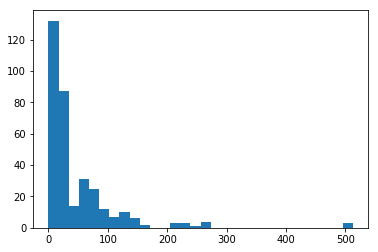

In [21]:
plt.hist(train_df[train_df['Survived'] == 1]['Fare'], 30)
plt.show()

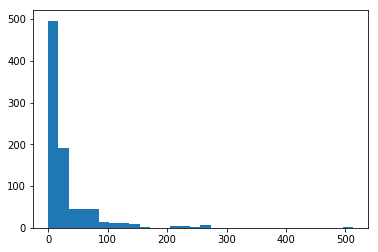

In [22]:
plt.hist(train_df['Fare'], 30)
plt.show()

In [23]:
class_counts = train_df['Pclass'].value_counts()

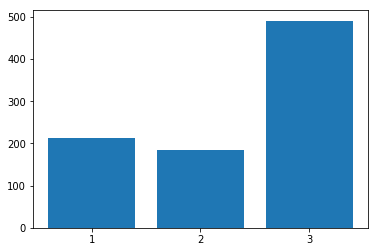

In [24]:
plt.bar(class_counts.keys(), class_counts.values)
plt.xticks(class_counts.keys())
plt.show()

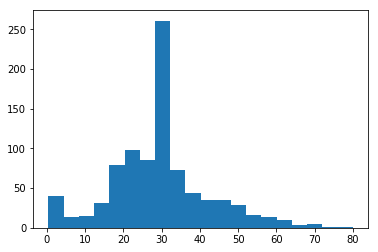

In [25]:
plt.hist(train_df['Age'], 20)
plt.show()

In [26]:
train_df[train_df['Age'] < 5].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,0,2.00,3,1,21.0750,0.0
10,1,3,1,4.00,1,1,16.7000,0.0
16,0,3,0,2.00,4,1,29.1250,2.0
43,1,2,1,3.00,1,2,41.5792,1.0
63,0,3,0,4.00,3,2,27.9000,0.0
78,1,2,0,0.83,0,2,29.0000,0.0
119,0,3,1,2.00,4,2,31.2750,0.0
164,0,3,0,1.00,4,1,39.6875,0.0
171,0,3,0,4.00,4,1,29.1250,2.0
172,1,3,1,1.00,1,1,11.1333,0.0


### bin ages into 0 - 5, 5 - 12, 12 - 20, 20 - 30, 30 - 50, 50 - 80

In [27]:
age_bins = [5, 12, 20, 30, 50]

train_df['Age'] = np.digitize(train_df['Age'].values, age_bins)

In [28]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,3,1,0,7.2500,0.0
1,1,1,1,4,1,0,71.2833,1.0
2,1,3,1,3,0,0,7.9250,0.0
3,1,1,1,4,1,0,53.1000,0.0
4,0,3,0,4,0,0,8.0500,0.0


In [29]:
age_counts = train_df['Age'].value_counts()

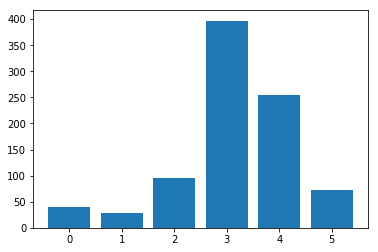

In [30]:
plt.bar(age_counts.keys(), age_counts.values)
plt.show()

In [31]:
train_df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [32]:
train_df.columns.dtype

dtype('O')

### bin fare

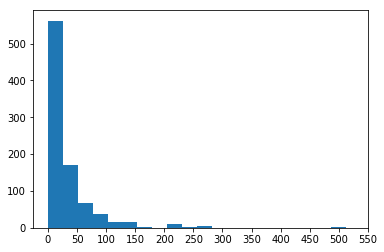

In [33]:
plt.hist(train_df['Fare'], bins=20)
plt.xticks(np.arange(0, 600, 50))
plt.show()

bin 0 - 50 50 - 200 200+

In [34]:
fare_bins = [50, 200, 300]

train_df['Fare'] = np.digitize(train_df['Fare'].values, fare_bins)
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,3,1,0,0,0.0
1,1,1,1,4,1,0,1,1.0
2,1,3,1,3,0,0,0,0.0
3,1,1,1,4,1,0,1,0.0
4,0,3,0,4,0,0,0,0.0


In [35]:
set(train_df['Fare'])

{0, 1, 2, 3}

Splitting the data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
classes = ['Survived']
features = list(train_df.columns.delete(int(train_df.columns.equals('Survived'))))

print("classes: {0}, features: {1}".format(classes, features))

classes: ['Survived'], features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [38]:
x = train_df[features].values
y = train_df[classes].values
split = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split, random_state=42)

Train Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [40]:
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV

def analyse_results(x, y, model, title):
    predict = model.predict(x)
    print ("=== " + title + " ===")
    
    if type(model) is GridSearchCV:
        print("Best values:{0}".format(model.best_estimator_))
    
    print("Accuracy: {0}".format(metrics.accuracy_score(y, predict)))
    
    print("Classification Report")
    print(metrics.classification_report(y, predict, labels=[0,1]))
    print()
    
    


In [41]:
analyse_results(x_train, y_train, nb_model, "Naive Bayese Training Data")
analyse_results(x_test, y_test, nb_model, "Naive Bayese Test Data")

=== Naive Bayese Training Data ===
Accuracy: 0.7942122186495176
Classification Report
             precision    recall  f1-score   support

          0       0.84      0.83      0.83       382
          1       0.73      0.74      0.74       240

avg / total       0.79      0.79      0.79       622


=== Naive Bayese Test Data ===
Accuracy: 0.797752808988764
Classification Report
             precision    recall  f1-score   support

          0       0.85      0.82      0.84       167
          1       0.72      0.76      0.74       100

avg / total       0.80      0.80      0.80       267




## Train Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, oob_score=True)
rf_model.fit(x_train, y_train.ravel())

analyse_results(x_train, y_train, rf_model, "Random Forest Training Data")
analyse_results(x_test, y_test, rf_model, "Random Forest Test Data")

=== Random Forest Training Data ===
Accuracy: 0.8971061093247589
Classification Report
             precision    recall  f1-score   support

          0       0.88      0.97      0.92       382
          1       0.94      0.78      0.85       240

avg / total       0.90      0.90      0.89       622


=== Random Forest Test Data ===
Accuracy: 0.7790262172284644
Classification Report
             precision    recall  f1-score   support

          0       0.80      0.87      0.83       167
          1       0.74      0.63      0.68       100

avg / total       0.78      0.78      0.77       267




/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(x_train, y_train.ravel())

analyse_results(x_train, y_train, lr_model, "Logistic Regression Training Data")
analyse_results(x_test, y_test, lr_model, "Logistic Regression Test Data")


=== Logistic Regression Training Data ===
Accuracy: 0.797427652733119
Classification Report
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       382
          1       0.77      0.68      0.72       240

avg / total       0.80      0.80      0.79       622


=== Logistic Regression Test Data ===
Accuracy: 0.797752808988764
Classification Report
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       167
          1       0.74      0.70      0.72       100

avg / total       0.80      0.80      0.80       267




In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lrc_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=50, cv=10, refit=True, class_weight="balanced")
lrc_model.fit(x_train, y_train.ravel())

analyse_results(x_train, y_train, lrc_model, "Logistic RegressionCV Training Data")
analyse_results(x_test, y_test, lrc_model, "Logistic RegressionCV Test Data")


=== Logistic RegressionCV Training Data ===
Accuracy: 0.792604501607717
Classification Report
             precision    recall  f1-score   support

          0       0.84      0.81      0.83       382
          1       0.72      0.76      0.74       240

avg / total       0.80      0.79      0.79       622


=== Logistic RegressionCV Test Data ===
Accuracy: 0.7940074906367042
Classification Report
             precision    recall  f1-score   support

          0       0.86      0.80      0.83       167
          1       0.70      0.78      0.74       100

avg / total       0.80      0.79      0.80       267




In [51]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import time

def evaluate_models(df, models, title, print_train=True): 
    classes = ['Survived']
    features = list(df.columns.delete(int(train_df.columns.equals('Survived'))))

    print("========= Evaluating: {0} =========".format(title))
    print("classes: {0}, features: {1}".format(classes, features))
    print("Models: {0}".format(list(models.keys())))
    print()
    
    x = df[features].values
    y = df[classes].values
    split = 0.30

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split, random_state=42)
    
    for k, model in models.items():
        
        start_time = time.time()
        model.fit(x_train, y_train.ravel())
        end_time = time.time()
        
        print("+++++++++++ {0} +++++++++++".format(k))
        print("Elasped Time {0}s".format(end_time - start_time))
        print()
 
        if print_train: 
            analyse_results(x_train, y_train, model, "{0} Training Data".format(k))
            
        analyse_results(x_test, y_test, model, "{0} Test Data".format(k))
        
    return models
        
mlp_parameters = {
    'mlp__learning_rate': ["constant", "invscaling", "adaptive"],
    'mlp__hidden_layer_sizes': [(100,10), (60, 10), (60, 5), (30, 10), (30, 5)],
    'mlp__alpha':   np.array([0.0001,0.00001, 0.000001, 0, 0]),
    'mlp__activation': ['relu']  #["logistic", "relu", "tanh"]
}

mlp_pipeline = Pipeline(steps=[('ss', StandardScaler()), ('mlp', MLPClassifier(solver='lbfgs'))])

mlp_cv = GridSearchCV(estimator=mlp_pipeline, param_grid=mlp_parameters, n_jobs=-1, scoring='accuracy', cv=10)

nb_pipeline = Pipeline(steps=[('ss', StandardScaler()), ('nb', GaussianNB())])
        
lrcv_parameters = {
    'lrcv__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'lrcv__Cs': [1, 2, 5, 7, 10, 50]
}

lrcv_pipeline = Pipeline(steps=[('ss', StandardScaler()), ('lrcv', LogisticRegressionCV(n_jobs=-1, cv=10, refit=True, class_weight="balanced"))])

lrcv_cv = GridSearchCV(estimator=lrcv_pipeline, param_grid=lrcv_parameters, n_jobs=-1, scoring='accuracy')

svc_parameters = {
    #'kernel': ['linear', 'rbf', 'sigmoid'],
    'class_weight': [None, 'balanced']
}

svc_cv = GridSearchCV(estimator=SVC(kernel='poly', degree=2), param_grid=svc_parameters, n_jobs=-1, scoring='accuracy', cv=10)

knn_parameters = {
    "knn__n_neighbors": [1,2,3,4,5,6,7],
    #"weights": ['uniform', 'distance'],
    #"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "knn__leaf_size": [5, 10, 30, 40, 50],
    "knn__p": [1, 2, 3, 4, 5],
}

knn_pipeline = Pipeline(steps=[('ss', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_cv = GridSearchCV(estimator=knn_pipeline, param_grid=knn_parameters, n_jobs=-1, scoring='accuracy', cv=10)

ada_param = {
    'ada__learning_rate': [0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.3],
    'ada__n_estimators': [25, 50, 100, 200, 500]
}

ada_pipeline = Pipeline(steps=[ ('ada', AdaBoostClassifier())])

ada_cv = GridSearchCV(estimator=ada_pipeline, param_grid=ada_param, n_jobs=-1, scoring='accuracy', cv=10)

test_models = {"Logistic Regession CV": LogisticRegressionCV(n_jobs=-1, cv=10, Cs=10, refit=True, class_weight="balanced"),
              "Naive Bayese": nb_pipeline,
              "Random Forest": RandomForestClassifier(random_state=42, max_features=None),
              "SVC": svc_cv,
              "MLP": mlp_cv,
              "KNN": knn_cv,
              "Ada": ada_cv
              }

test_models = { "Ada" : ada_cv }
        
trained_models = evaluate_models(train_df, test_models,  "Test 1")
    

========= Evaluating: Test 1 =========
classes: ['Survived'], features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Models: ['Ada']

+++++++++++ Ada +++++++++++
Elasped Time 97.11781978607178s

=== Ada Training Data ===
Best values:Pipeline(steps=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None))])
Accuracy: 0.8183279742765274
Classification Report
             precision    recall  f1-score   support

          0       0.84      0.87      0.85       382
          1       0.78      0.74      0.76       240

avg / total       0.82      0.82      0.82       622


=== Ada Test Data ===
Best values:Pipeline(steps=[('ada', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None))])
Accuracy: 0.8202247191011236
Classification Report
             precision    recall  f1-score   support

          0       0.85      0.87 

In [52]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,3,1,0,0,0.0
1,1,1,1,4,1,0,1,1.0
2,1,3,1,3,0,0,0,0.0
3,1,1,1,4,1,0,1,0.0
4,0,3,0,4,0,0,0,0.0
5,0,3,0,3,0,0,0,2.0
6,0,1,0,5,0,0,1,0.0
7,0,3,0,0,3,1,0,0.0
8,1,3,1,3,0,2,0,0.0
9,1,2,1,2,1,0,0,1.0


In [53]:
no_fare = train_df.drop("Fare", axis=1)
no_fare.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,3,1,0,0.0
1,1,1,1,4,1,0,1.0
2,1,3,1,3,0,0,0.0
3,1,1,1,4,1,0,0.0
4,0,3,0,4,0,0,0.0
5,0,3,0,3,0,0,2.0
6,0,1,0,5,0,0,0.0
7,0,3,0,0,3,1,0.0
8,1,3,1,3,0,2,0.0
9,1,2,1,2,1,0,1.0


evaluate_models(no_fare, test_models, "Test 2 - No Fare feature")

## Checking correlation

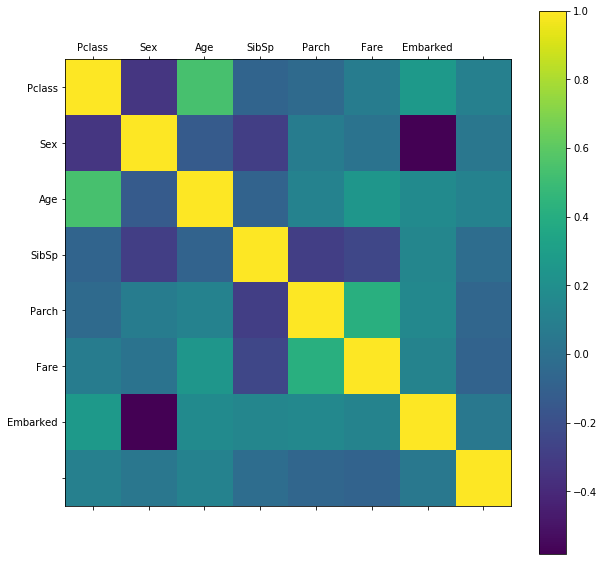

In [54]:
def plot_corrs(df):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr())
    fig.colorbar(cax)
    
    ax.set_xticklabels(['']+df.columns)
    ax.set_yticklabels(['']+df.columns)
    
    plt.show()
    
plot_corrs(train_df)

## try no class

no_class = train_df.drop("Pclass", axis=1)
no_class.head(10)

evaluate_models(no_class, test_models, "Test 3 - No Fare feature")

## No  Age

no_age = train_df.drop("Age", axis=1)
no_age.head(10)

evaluate_models(no_age, test_models, "Test 4 - No Age feature")

## No Fare & No class

no_fare_class = train_df.drop("Pclass", axis=1).drop("Fare", axis=1)
no_fare_class.head(5)

evaluate_models(no_fare_class, test_models, "Test 5 - No Age feature")

# First Submission

In [56]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [63]:
def prep_data(df):
    prepared = df.copy()
    
    del prepared['Ticket']
    del prepared['Cabin']
    del prepared['Name']
    del prepared['PassengerId']
    
    prepared['Embarked'] = prepared['Embarked'].map({'S': int(0), 'C': int(1), 'Q': int(2)})
    prepared['Sex'] = prepared['Sex'].map({'male':0, 'female':1})
    
    
    mean_age = prepared[prepared['Age'] == prepared['Age']]['Age'].mean()
    prepared['Age'].fillna(mean_age, inplace=True)
    
    age_bins = [5, 12, 20, 30, 50]
    prepared['Age'] = np.digitize(prepared['Age'].values, age_bins)
    
    fare_bins = [50, 200, 300]
    prepared['Fare'] = np.digitize(prepared['Fare'].values, fare_bins)
    
    return prepared
    
prepared = prep_data(test_df)

prepared.head(5)    

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,4,0,0,0,2
1,3,1,4,1,0,0,0
2,2,0,5,0,0,0,2
3,3,0,3,0,0,0,0
4,3,1,3,1,1,0,0


In [92]:
model = trained_models['Ada']

test_df['Survived'] = model.predict(prepared)

test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0


In [81]:
test_df[(test_df['prediction'] == 1) & (test_df['Age'] < 10) & (test_df['prediction'] == 0)].head(10) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction


In [90]:
test_df[test_df['Age'] < 10].count()

PassengerId    20
Pclass         20
Name           20
Sex            20
Age            20
SibSp          20
Parch          20
Ticket         20
Fare           20
Cabin           2
Embarked       20
prediction     20
dtype: int64

In [100]:
def write_results(df):
    submission = df[["PassengerId", "Survived"]]
    
    submission.to_csv('./results.csv', index=False)
    
    return submission
    

write_results(test_df).head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
